#Observations

1: CBS runs relatively positive compared to the rest of the news sites. With a .3 average positive above the next, BBC.CBS also had the slowest average time of tweets, with the average being about every 4 hours. BBC has an average of every 45 minutes, CNN and New York Times have an average of every 15 minutes, and Fox is every 5 minutes. 

2: I wanted to see the average hours between tweets. It looked like, Fox had the most tweets per hour with .09 hours between each tweet. That's about every 5 minutes. Partially it may have been due to what was captured during my data grab from twitter. A lot of the newer tweets were posted almost at the same time. Which was likely advertising for the evenings other television programs. 

3: I expected that the news agency with the average quickest time between tweets would be the most negative. But average tweets seemed to have no true correlation between negative or positive sentiment analysis. Most likely, the more positive of analysis came from news agencies that own other programming and advertise for that on their show. CNN and New York Times both do not advertise for other shows and there for do not have as many positive tweets. Whereas BBC, CBS and Fox all have other shows that take up programming time on their networks. 


In [98]:
# Dependencies
import tweepy
import json
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import timedelta

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [85]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Target User Accounts
target_user = ("@CNN", "@BBC", "@FoxNews", "@CBS", "@nytimes")

def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)

# Create list to hold dataframe
dataX = []
# Loop through each user
for user in target_user:

    # Loop through 5 pages of tweets (total 100 tweets), each page holds 20 tweets
    for page in limit_handled(tweepy.Cursor(api.user_timeline,id=user).pages(5)):
        for tweet in page:
            
            # Loop through all tweets
            tweet = json.dumps(tweet._json, indent=3)
            tweet = json.loads(tweet)         
            text = tweet['text']
            tweet_time = tweet["created_at"]

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]
            
            # Add each value to the array
            dataX.append([user,text,tweet_time, compound, pos, neg, neu])
            
#Create a dataframe with the information
news_df = pd.DataFrame(dataX, columns = ["user","text","time","compound analysis", "positive analysis", "negative analysis", "neutral analysis"])
news_df          
            

C:\Users\Ash\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:28: DeprecationWarning: generator 'limit_handled' raised StopIteration


,user,text,time,compound analysis,positive analysis,negative analysis,neutral analysis
0,@CNN,"Every year, officials on Christmas Island clos...",Sun Dec 24 04:01:53 +0000 2017,0.0000,0.000,0.000,1.000
1,@CNN,Nearly 7 in 10 Americans say sexual harassment...,Sun Dec 24 03:30:04 +0000 2017,-0.7947,0.000,0.335,0.665
2,@CNN,Almost 6 in 10 Americans have a favorable opin...,Sun Dec 24 03:00:12 +0000 2017,0.6597,0.231,0.000,0.769
3,@CNN,At least 37 people are missing and feared dead...,Sun Dec 24 02:37:03 +0000 2017,-0.9313,0.000,0.482,0.518
4,@CNN,President Trump's holiday visit to Mar-a-Lago ...,Sun Dec 24 02:30:15 +0000 2017,0.4019,0.124,0.000,0.876
5,@CNN,Meet the culinary master known as ‘papa’ | via...,Sun Dec 24 02:02:58 +0000 2017,0.0000,0.000,0.000,1.000
6,@CNN,Hundreds of EPA employees have left the agency...,Sun Dec 24 01:30:08 +0000 2017,0.0000,0.000,0.000,1.000
7,@CNN,Ohio Gov. John Kasich has signed a bill that p...,Sun Dec 24 01:00:14 +0000 2017,0.0000,0.000,0.000,1.000
8,@CNN,Pardon the interruption: This Virgin Australia...,Sun Dec 24 00:31:05 +0000 2017,0.6705,0.356,0.111,0.533
9,@CNN,A video capturing an unidentified object flyin...,Sun Dec 24 00:16:23 +0000 2017,0.0000,0.000,0.000,1.000


In [90]:
#Save dataframe to a csv file 
news_df.to_csv("news_df2.csv", encoding="utf-8", index=False)

# Now that the dataframe has been saved, lets use this information instead of uploading openweather all the time. 
news_data = pd.read_csv("news_df2.csv")
news_data

,user,text,time,compound analysis,positive analysis,negative analysis,neutral analysis
0,@CNN,"Every year, officials on Christmas Island clos...",Sun Dec 24 04:01:53 +0000 2017,0.0000,0.000,0.000,1.000
1,@CNN,Nearly 7 in 10 Americans say sexual harassment...,Sun Dec 24 03:30:04 +0000 2017,-0.7947,0.000,0.335,0.665
2,@CNN,Almost 6 in 10 Americans have a favorable opin...,Sun Dec 24 03:00:12 +0000 2017,0.6597,0.231,0.000,0.769
3,@CNN,At least 37 people are missing and feared dead...,Sun Dec 24 02:37:03 +0000 2017,-0.9313,0.000,0.482,0.518
4,@CNN,President Trump's holiday visit to Mar-a-Lago ...,Sun Dec 24 02:30:15 +0000 2017,0.4019,0.124,0.000,0.876
5,@CNN,Meet the culinary master known as ‘papa’ | via...,Sun Dec 24 02:02:58 +0000 2017,0.0000,0.000,0.000,1.000
6,@CNN,Hundreds of EPA employees have left the agency...,Sun Dec 24 01:30:08 +0000 2017,0.0000,0.000,0.000,1.000
7,@CNN,Ohio Gov. John Kasich has signed a bill that p...,Sun Dec 24 01:00:14 +0000 2017,0.0000,0.000,0.000,1.000
8,@CNN,Pardon the interruption: This Virgin Australia...,Sun Dec 24 00:31:05 +0000 2017,0.6705,0.356,0.111,0.533
9,@CNN,A video capturing an unidentified object flyin...,Sun Dec 24 00:16:23 +0000 2017,0.0000,0.000,0.000,1.000


In [107]:
#Seperate by User and get the date time objects right
cnn = news_data.loc[0:99]
# Convert all tweet times into datetime objects
tweet_time_objects = []
tweet_times = cnn['time']
# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    
# Calculate the time between tweets
cnn_time_btw = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    cnn_time_btw.append(hrs_apart)


In [108]:
fox = news_data.loc[200:299].reset_index()
# Convert all tweet times into datetime objects
tweet_time_objects = []
tweet_times = fox['time']

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    
# Calculate the time between tweets
fox_time_btw = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    fox_time_btw.append(hrs_apart)


In [109]:
bbc = news_data.loc[100:199].reset_index()

# Convert all tweet times into datetime objects
tweet_time_objects = []
tweet_times = bbc['time']
# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    
# Calculate the time between tweets
bbc_time_btw = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    bbc_time_btw.append(hrs_apart)

In [110]:
cbs = news_data.loc[300:399].reset_index()

# Convert all tweet times into datetime objects
tweet_time_objects = []
tweet_times = cbs['time']
# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    
# Calculate the time between tweets
cbs_time_btw = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    cbs_time_btw.append(hrs_apart)
    

In [137]:
nyt = news_data.loc[400:499].reset_index()
 
# Convert all tweet times into datetime objects
tweet_time_objects = []
tweet_times = nyt['time']
# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    
# Calculate the time between tweets
nyt_time_btw = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    nyt_time_btw.append(hrs_apart)


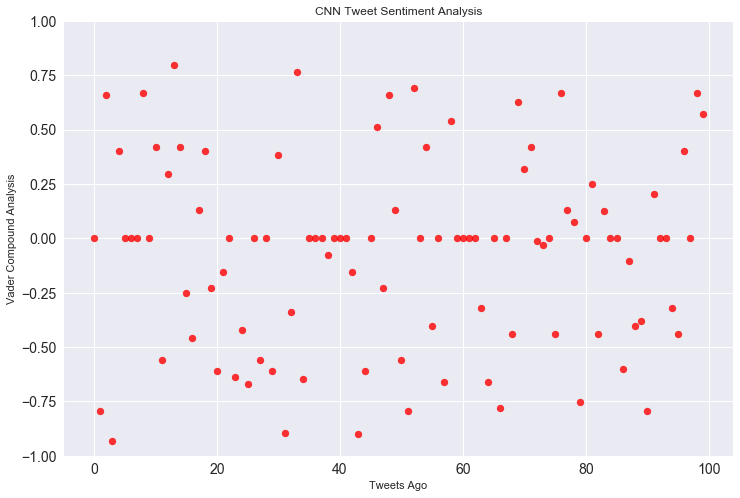

Avg. Hours Between Tweets: 0.273173400673


In [138]:
sns.set()
plt.figure(figsize = (12,8))
news = cnn
x = range(len(cnn_time_btw) + 1)
y = news['compound analysis']
plt.scatter(x, y, marker="o", alpha=0.8, color="r")

#Add labels to the x and y axes
plt.title( "CNN Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Vader Compound Analysis")
#Set the upper and lower limits of our x and y axis
plt.ylim(-1,1)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Save Figure
plt.savefig("Fig1.png")

plt.show()
# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(cnn_time_btw))

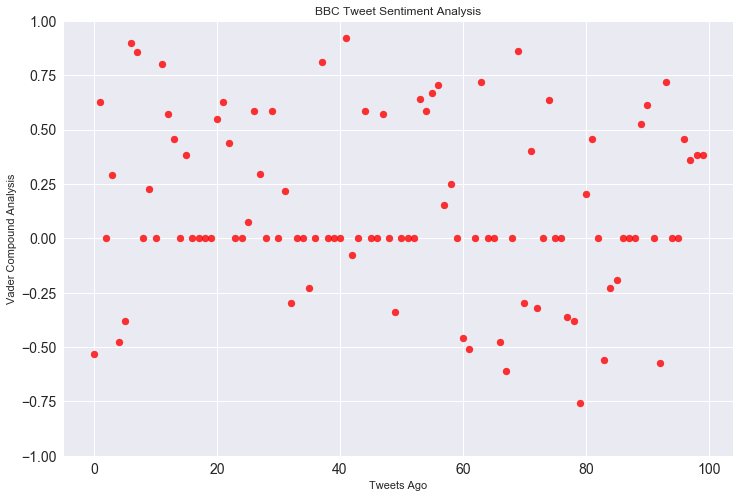

Avg. Hours Between Tweets: 0.743959034792


In [139]:
plt.figure(figsize = (12,8))
news = bbc
x = range(len(bbc_time_btw) + 1)
y = news['compound analysis']
plt.scatter(x, y, marker="o", alpha=0.8, color="r")

#Add labels to the x and y axes
plt.title("BBC Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Vader Compound Analysis")
#Set the upper and lower limits of our x and y axis
plt.ylim(-1,1)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Save Figure
plt.savefig("Fig2.png")

plt.show()
# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(bbc_time_btw))

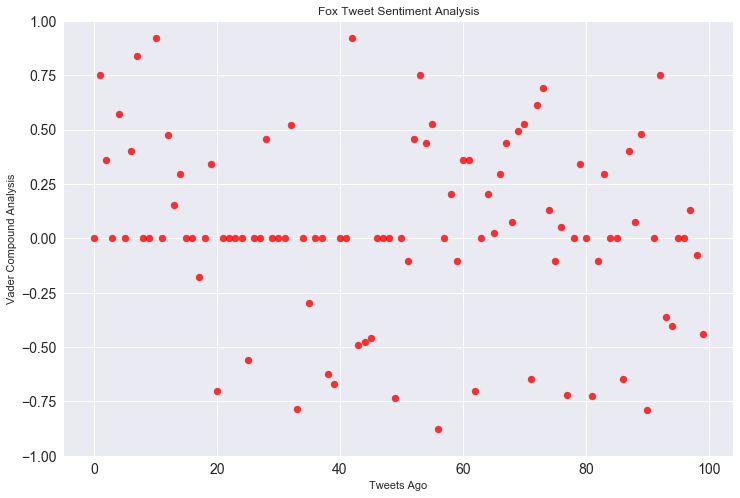

Avg. Hours Between Tweets: 0.0916386083053


In [140]:
sns.set()
plt.figure(figsize = (12,8))
news = fox
x = range(len(fox_time_btw) + 1)
y = news['compound analysis']
plt.scatter(x, y, marker="o", alpha=0.8, color="r")

#Add labels to the x and y axes
plt.title( "Fox Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Vader Compound Analysis")
#Set the upper and lower limits of our x and y axis
plt.ylim(-1,1)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Save Figure
plt.savefig("Fig3.png")

plt.show()
# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(fox_time_btw))

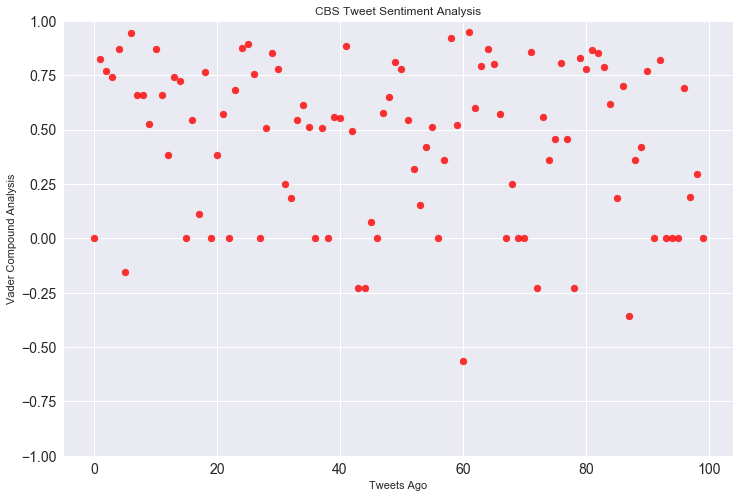

Avg. Hours Between Tweets: 4.79982603816


In [141]:
sns.set()
plt.figure(figsize = (12,8))
news = cbs
x = range(len(cbs_time_btw) + 1)
y = news['compound analysis']
plt.scatter(x, y, marker="o", alpha=0.8, color="r")

#Add labels to the x and y axes
plt.title( "CBS Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Vader Compound Analysis")
#Set the upper and lower limits of our x and y axis
plt.ylim(-1,1)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Save Figure
plt.savefig("Fig4.png")

plt.show()
# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(cbs_time_btw))

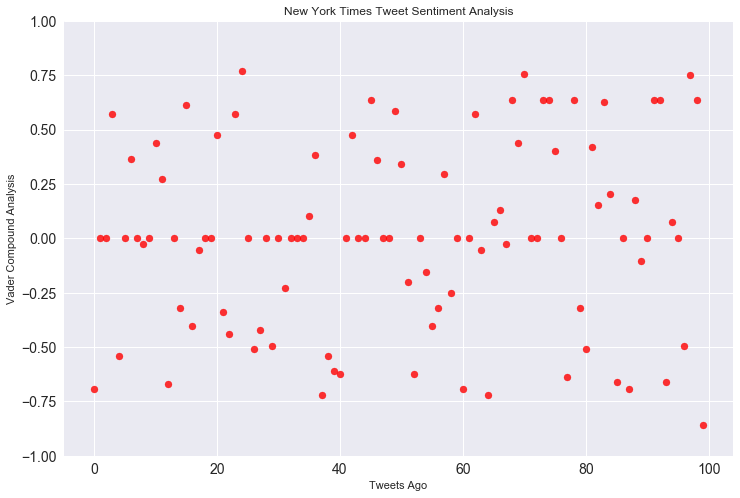

Avg. Hours Between Tweets: 0.230956790123


In [142]:
plt.figure(figsize = (12,8))
news = nyt
x = range(len(nyt_time_btw) + 1)
y = news['compound analysis']
plt.scatter(x, y, marker="o", alpha=0.8, color="r")

#Add labels to the x and y axes
plt.title( "New York Times Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Vader Compound Analysis")
#Set the upper and lower limits of our x and y axis
plt.ylim(-1,1)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Save Figure
plt.savefig("Fig5.png")

plt.show()
# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(nyt_time_btw))

In [143]:
# Print the Averages for each user
news_com_average = news_data.groupby(["user"]).mean()["compound analysis"].rename("Average Compound Analysis")  
news_pos_average = news_data.groupby(["user"]).mean()["positive analysis"].rename("Average Positive Analysis") 
news_neg_average = news_data.groupby(["user"]).mean()["negative analysis"].rename("Average Negative Analysis")
news_pos_average = news_data.groupby(["user"]).mean()["neutral analysis"].rename("Average Neutral Analysis")

# Convert to DataFrame
news_average = pd.DataFrame({"Average Compound Analysis": news_com_average, "Average Positive Analysis": news_pos_average, 
                             "Average Negative Analysis": news_neg_average, "Average Neutral Analysis": news_pos_average})
# Minor Data Munging
news_average = news_average.loc[:, ["Average Compound Analysis", "Average Positive Analysis", "Average Negative Analysis", "Average Neutral Analysis"]]

#Display the vader averages
news_average

,Average Compound Analysis,Average Positive Analysis,Average Negative Analysis,Average Neutral Analysis
user,,,,
@BBC,0.130525,0.86731,0.03950,0.86731
@CBS,0.443424,0.80650,0.01080,0.80650
@CNN,-0.073019,0.83595,0.09874,0.83595
@FoxNews,0.033618,0.82697,0.08100,0.82697
@nytimes,0.005027,0.81043,0.09091,0.81043


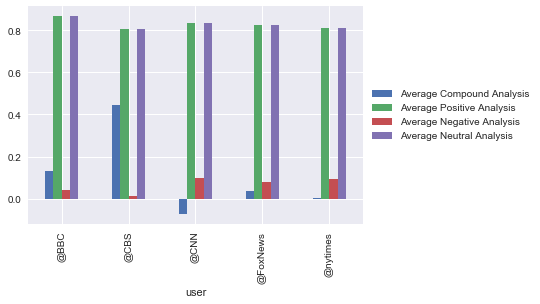

BBC Avg. Hours Between Tweets: 0.743959034792
CBS Avg. Hours Between Tweets: 4.79982603816
CNN Avg. Hours Between Tweets: 0.273173400673
Fox News Avg. Hours Between Tweets: 0.0916386083053
New York Times Avg. Hours Between Tweets: 0.230956790123


In [136]:
plt.figure(figsize = (12,8))
news_average.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
print("BBC Avg. Hours Between Tweets: %s" % np.mean(bbc_time_btw))
print("CBS Avg. Hours Between Tweets: %s" % np.mean(cbs_time_btw))
print("CNN Avg. Hours Between Tweets: %s" % np.mean(cnn_time_btw))
print("Fox News Avg. Hours Between Tweets: %s" % np.mean(fox_time_btw))
print("New York Times Avg. Hours Between Tweets: %s" % np.mean(nyt_time_btw))